In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")


clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
trialdata = pd.merge(mouse_drug_data, clinical_trial_data, on='Mouse ID')
trialdata

# Display the data table for preview



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = trialdata.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
tumormean_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_mean})
# Preview DataFrame
tumormean_df = tumormean_df.reset_index()

tumormean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = trialdata.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
tumorsem_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_sem})
# Preview DataFrame
tumorsem_df = tumor_sem.reset_index()
tumorsem_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_pivot = tumormean_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
tumor_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
tumor_sem = tumorsem_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
tumor_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


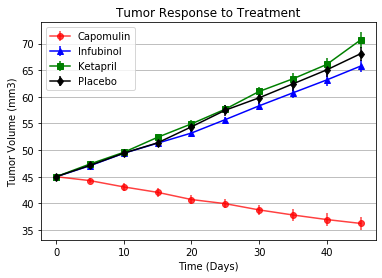

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_pivot.index, tumor_pivot['Capomulin'],yerr=tumor_sem['Capomulin'], color='red', marker='o', label='Capomulin', alpha=.75)
plt.errorbar(tumor_pivot.index, tumor_pivot['Infubinol'],yerr=tumor_sem['Infubinol'],color='blue', marker='^', label='Infubinol')
plt.errorbar(tumor_pivot.index, tumor_pivot['Ketapril'],yerr=tumor_sem['Ketapril'],color='g', marker='s', label='Ketapril')
plt.errorbar(tumor_pivot.index, tumor_pivot['Placebo'],yerr=tumor_sem['Placebo'],color='k', marker='d', label='Placebo')
plt.legend(loc='Upper Left')
plt.grid(axis="y")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.show()
# Save the Figure
plt.savefig('tumor_response')

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met = trialdata.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
Metmean = pd.DataFrame({'Metastatic Sites': Met})
# Preview DataFrame
Metmean = Metmean.reset_index()
Metmean

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Met_sem = trialdata.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
Met_df = pd.DataFrame({'Metastatic Sites': Met_sem})
# Preview DataFrame
Met_df = Met_df.reset_index()
Met_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [10]:
# Minor Data Munging to Re-Format the Data Frames

Met_pivot = Met_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
Met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


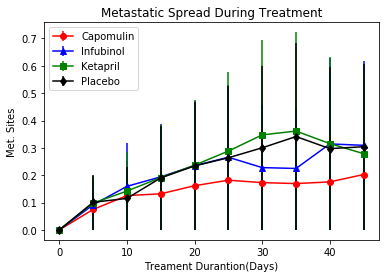

In [11]:
# Generate the Plot (with Error Bars)

plt.errorbar(Met_pivot.index, Met_pivot['Capomulin'],yerr=Met_sem['Capomulin'],color='r', marker='o', label='Capomulin')
plt.errorbar(Met_pivot.index, Met_pivot['Infubinol'],yerr=Met_sem['Infubinol'],color='b', marker='^', label='Infubinol')
plt.errorbar(Met_pivot.index, Met_pivot['Ketapril'],yerr=Met_sem['Ketapril'],color='g', marker='s', label='Ketapril')
plt.errorbar(Met_pivot.index, Met_pivot['Placebo'],yerr=Met_sem['Placebo'],color='k', marker='d', label='Placebo')
plt.legend(loc='upper left')
plt.xlabel('Treament Durantion(Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
           


# Save the Figure
plt.savefig('metastatic_spread')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount = trialdata.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Convert to DataFrame
survival_df = pd.DataFrame({"Count of Mice": micecount})
# Preview DataFrame


survival_df = survival_df.reset_index()
survival_df

,Drug,Timepoint,Count of Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [13]:
# Minor Data Munging to Re-Format the Data Frames
micecount_pivot = survival_df.pivot(index='Timepoint', columns='Drug')['Count of Mice']
# Preview the Data Frame
#micecount_pi = pd.DataFrame(micecount_pivot)
micecount_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [14]:
mice_percent = [micecount_pivot.loc[:]/ micecount_pivot.loc[0]* 100] 
mice_percent

[Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
 Timepoint                                                                
 0              100.0     100.0      100.0     100.0     100.0    100.0   
 5              100.0      84.0      100.0      92.0      92.0     96.0   
 10             100.0      80.0       84.0      88.0      84.0     96.0   
 15              96.0      76.0       84.0      76.0      84.0     80.0   
 20              92.0      72.0       80.0      76.0      80.0     76.0   
 25              88.0      72.0       72.0      76.0      72.0     68.0   
 30              88.0      64.0       68.0      72.0      60.0     60.0   
 35              88.0      56.0       48.0      68.0      60.0     56.0   
 40              84.0      56.0       40.0      60.0      60.0     48.0   
 45              84.0      52.0       36.0      44.0      52.0     44.0   
 
 Drug         Propriva  Ramicane    Stelasyn  Zoniferol  
 Timepoint                              

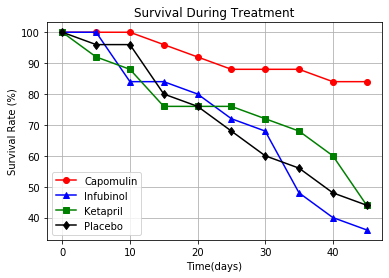

In [15]:
# Generate the Plot (Accounting for percentages)
#plt.plot(mice_percent.index, mice_percent['Capomulin'], )
plt.plot((micecount_pivot['Capomulin']/ 25 * 100), color='r', marker='o', label='Capomulin')
plt.plot((micecount_pivot['Infubinol']/ 25 * 100), color='b', marker='^', label='Infubinol')
plt.plot((micecount_pivot['Ketapril']/ 25 * 100), color='g', marker='s', label='Ketapril')
plt.plot((micecount_pivot['Placebo']/ 25 * 100), color='k', marker='d', label='Placebo')
plt.xlabel('Time(days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.grid()
plt.legend(loc='best')
# Save the Figure
plt.savefig('survival')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug
percentage = (tumor_pivot.loc[45]-tumor_pivot.loc[0])/ tumor_pivot.loc[0] * 100
# Display the data to confirm
percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

NameError: name 'percent' is not defined

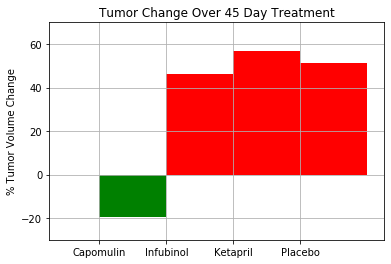

In [26]:
# Store all Relevant Percent Changes into a Tupl
percent_tuple = (percentage["Capomulin"], percentage["Infubinol"], percentage["Ketapril"], percentage["Placebo"])
drugs = ['Capomulin','Infubinol', 'Ketapril','Placebo' ]

# Splice the data between passing and failing drugs
y_axis = percent_tuple
plt.ylabel("% Tumor Volume Change")
x_axis = np.arange(len(percent_tuple))
plt.xticks(x_axis, drugs)
plt.grid()
plt.ylim(-30, 70)
plt.xlim(-.75, 4.25, 1)
plt.title('Tumor Change Over 45 Day Treatment')



# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes

for i,y in enumerate(y_axis):
    if y<0:
       bar1 = plt.bar(x_axis[i], y, color="g", width=1, alpha=1, align="edge")
    else:
       bar1 = plt.bar(x_axis[i], y, color="r", width=1, alpha=1, align="edge")
    
# Call functions to implement the function calls
for i in percent.patches:
    percent.text(i.x_axis()+.12, i.percent_tuple()-3),str(round((i.percent_tuple, 2))+'%', fontsize=22, color='white')
    


# Save the Figure
plt.savefig('45_day_treatment')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)